Based on the Kaggle competition: Titanic - Machine Learning from Disaster

How to get started: https://www.youtube.com/watch?v=8yZMXCaFshs

Link of the competition: https://www.kaggle.com/competitions/titanic

Discussion forum: https://www.kaggle.com/c/titanic/discussion

#Librerias

In [ ]:
#Manipulación de datos
import numpy as np
import pandas as pd

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Data

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train_columns=train.columns
test_columns=test.columns

In [ ]:
display(train_columns,train.head(),
test_columns,test.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Información general del Dataset

##Análisis descriptivo

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print("Las columnas númericas son:",train.select_dtypes(include = [np.number,float], exclude = "object").columns)
display(train.describe()) #Descripción metricas objetos númericos

Las columnas númericas son: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. Las distribuciones de Age y Fare muestran valores extremos.
2. La mayoría de las personas (sobre 75%) viajan sin padres o hijos.
3. Al menos la mitad de las personas viajan sin esposa/esposo.

In [ ]:
print("Las columnas categoricas son:",train.select_dtypes(include = "object", exclude = [np.number,float]).columns)
train.describe(include="object") #Descripción objetos categoricos.

Las columnas categoricas son: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


1.   Variable Name sin tratamiento no aporta información ya que todos tienen un valor diferente
2.   El sexo tiene dos valores, en donde el masculino es el que más se repite.
3.  Cabina presenta muchos datos nulos.
4. Embarked corresponde a tres categorias y posee nulos.



In [ ]:
#Cantidad de datos nulos
np.sum(train.isnull())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Cantidad de datos nulos
np.sum(test.isnull())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

En ambos Dataset se encuentran muchos nulos en la columna "Cabin". Debemos tratar los nulos en Age, cabin y embarked en el train. Para el testeo hay que tener en cuenta los nulos presentes en Age, Fare y Cabin.

###Analisis por variable.

Asumo:
1. PassangerId no tiene aporte en el dataset de entrenamiento.
2. Cabin posee una cantidad de nulos que descarta la variable en ambos dataset(train y test).
3. Ticket no entrega mayor información al problema, por lo que se descarta la variable.
4. Se deben tratar los nulos de Age, Fare y embarked.

In [ ]:
train["Name"].tail(25)

866                        Duran y More, Miss. Asuncion
867                Roebling, Mr. Washington Augustus II
868                         van Melkebeke, Mr. Philemon
869                     Johnson, Master. Harold Theodor
870                                   Balkic, Mr. Cerin
871    Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                            Carlsson, Mr. Frans Olof
873                         Vander Cruyssen, Mr. Victor
874               Abelson, Mrs. Samuel (Hannah Wizosky)
875                    Najib, Miss. Adele Kiamie "Jane"
876                       Gustafsson, Mr. Alfred Ossian
877                                Petroff, Mr. Nedelio
878                                  Laleff, Mr. Kristo
879       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880        Shelley, Mrs. William (Imanita Parrish Hall)
881                                  Markun, Mr. Johann
882                        Dahlberg, Miss. Gerda Ulrika
883                       Banfield, Mr. Frederic

Si bien los nombres son identificadores de cada persona, podemos rescatar sus titulos/posiciones para observar si sus grados tienen inferencia en su sobrevivencia que es lo que si comparten entre pasajeros.

In [ ]:
variable="Sex"
print(f"Porcentaje de sobrevivencia [1] o muerte [0] por categoria {variable}.")
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False).apply(lambda r: r/r.sum() *100,axis=1)

Porcentaje de sobrevivencia [1] o muerte [0] por categoria Sex.


Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


In [ ]:
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False)

Survived,0,1
Sex,,
female,81,233
male,468,109


La mayoría de las mujer sobreviven

In [ ]:
variable="SibSp"
print(f"Porcentaje de sobrevivencia [1] o muerte [0] por categoria {variable}.")
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False).apply(lambda r: r/r.sum() *100,axis=1)

Porcentaje de sobrevivencia [1] o muerte [0] por categoria SibSp.


Survived,0,1
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,0.000000
8,100.000000,0.000000


In [ ]:
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [ ]:
variable="Parch"
print(f"Porcentaje de sobrevivencia [1] o muerte [0] por categoria {variable}.")
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False).apply(lambda r: r/r.sum() *100,axis=1)

Porcentaje de sobrevivencia [1] o muerte [0] por categoria Parch.


Survived,0,1
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,0.000000
5,80.000000,20.000000
6,100.000000,0.000000


In [ ]:
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False)

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


Existen categorias que no sobreviven en un 100% tanto para parch o sibsp

In [ ]:
variable="Pclass"
print(f"Porcentaje de sobrevivencia [1] o muerte [0] por categoria {variable}.")
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False).apply(lambda r: r/r.sum() *100,axis=1)

Porcentaje de sobrevivencia [1] o muerte [0] por categoria Pclass.


Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


In [ ]:
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


A medida que se desciende de clase (Pclass) aumenta el rango de mortalidad. 1:Clase alta, 3: Clase Baja.

In [ ]:
variable="Embarked"
print(f"Porcentaje de sobrevivencia [1] o muerte [0] por categoria {variable}.")
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False).apply(lambda r: r/r.sum() *100,axis=1)

Porcentaje de sobrevivencia [1] o muerte [0] por categoria Embarked.


Survived,0,1
Embarked,,
C,44.642857,55.357143
Q,61.038961,38.961039
S,66.304348,33.695652


In [ ]:
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False)

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


La mayoría embarca en southampton. [S], sin embargo la Q presenta la mayor tasa de sobrevivencia.

##Analisis visualizaciones

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

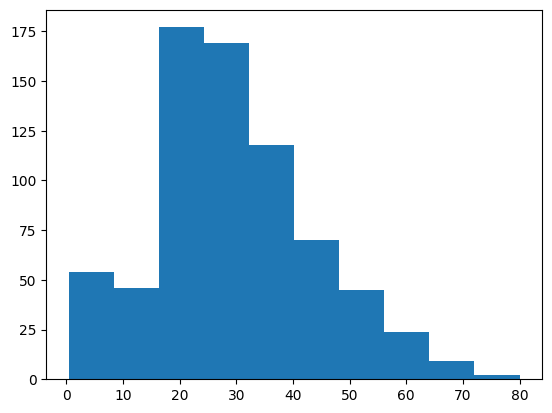

In [ ]:
plt.hist(train["Age"])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

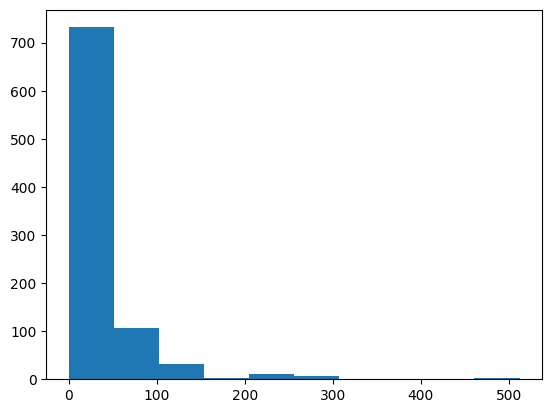

In [ ]:
plt.hist(train["Fare"])

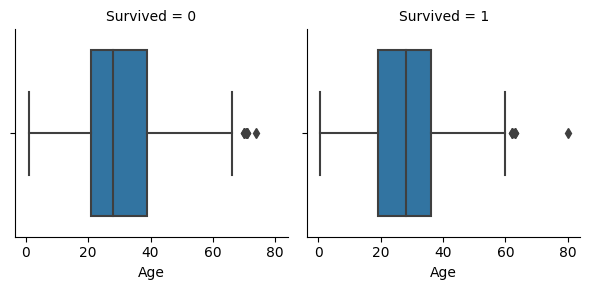

In [ ]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(sns.boxplot, 'Age',order=[0,1])

Age cuenta con valores extremos, por sobre los 60 años.

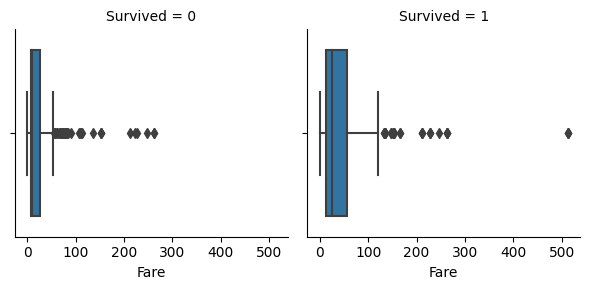

In [ ]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(sns.boxplot, 'Fare',order=[0,1])

La tarifa cuenta con bastantes puntos outliers, tanto en la sobrevivencia como no.

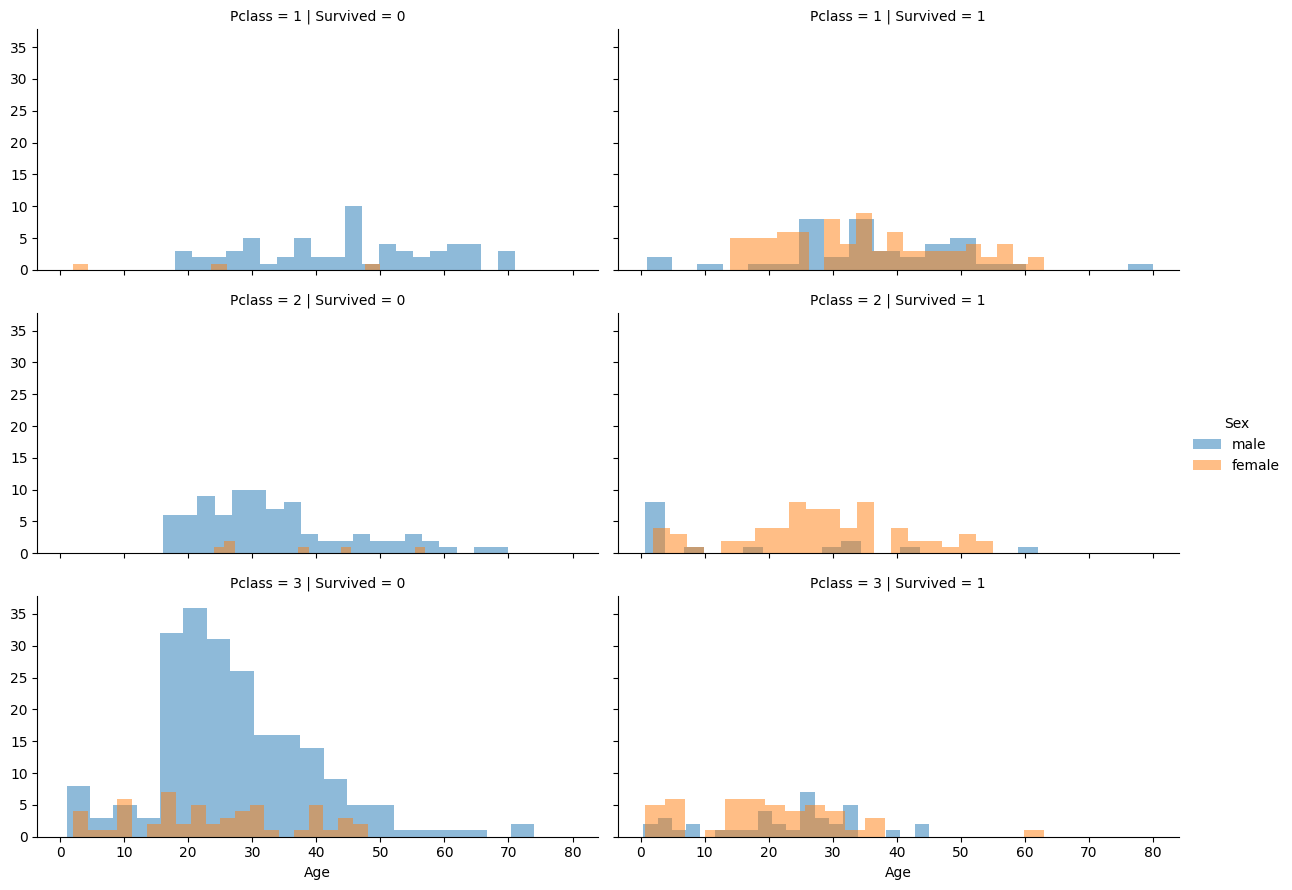

In [ ]:
variable='Pclass'
variable2='Age'
grid = sns.FacetGrid(train, col='Survived', row=variable, aspect=2,hue="Sex")
grid.map(plt.hist, variable2, alpha=.5, bins=20)
grid.add_legend();

La mayoría de los pasajeros se encuentran en la clase 3, en donde la mayoría es hombre y no sobreviven. En la clase 1 y 2 la gran mayoria de los infantes sobreviven, la clase 3 no corre la misma suerte.
La variable Pclass indica ser una variable importante a la hora de la sobreviencia al igual que Sex.

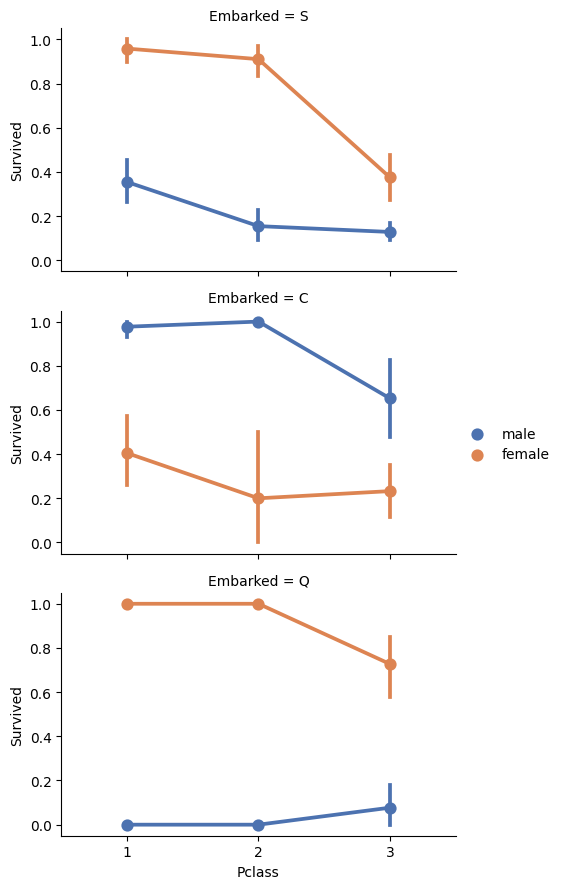

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Los hombres quienes embarcaron en C tienen mejor ratio de sobrevivencia. En general las mujeres sobreviven más que los hombres. En general la sobrevivencia de las mujeres empeora al disminuir la clase al igual que los hombres aunque se destacan casos como en C o Q donde esto no ocurre respectivamente. Procedemos a observar esto en detalle en base a su tarifa de adquisición

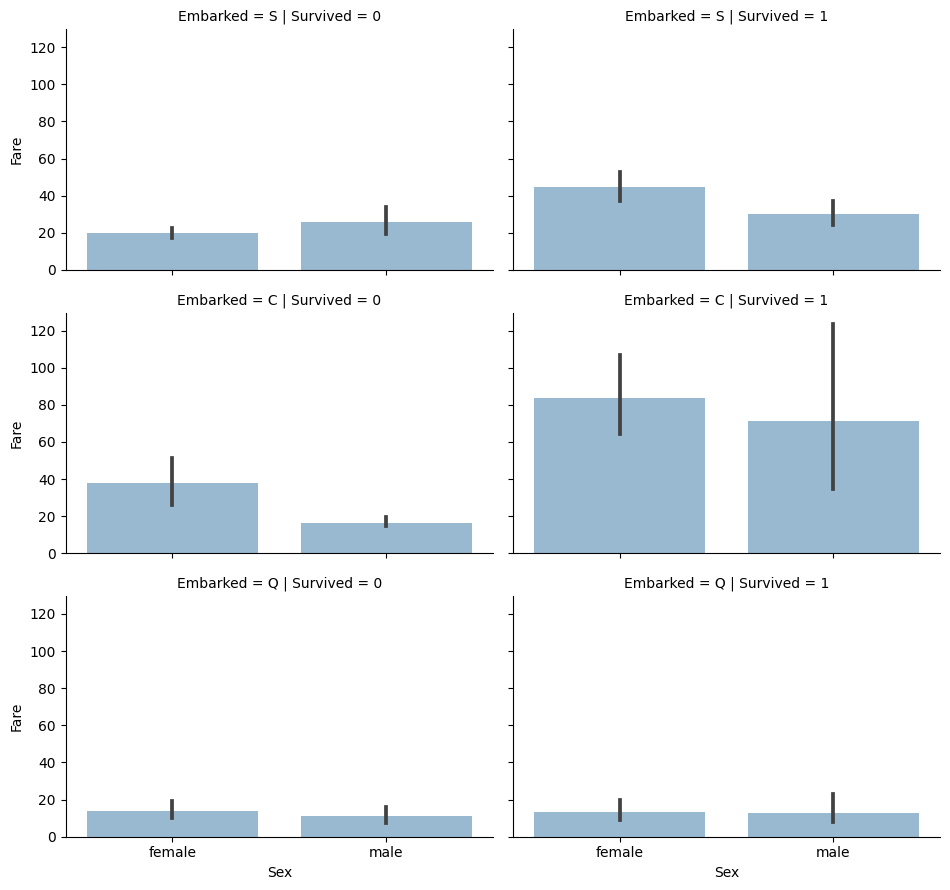

In [ ]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)

Salvo en Q, se observaron mayores tarifas en la sobrevivencia.

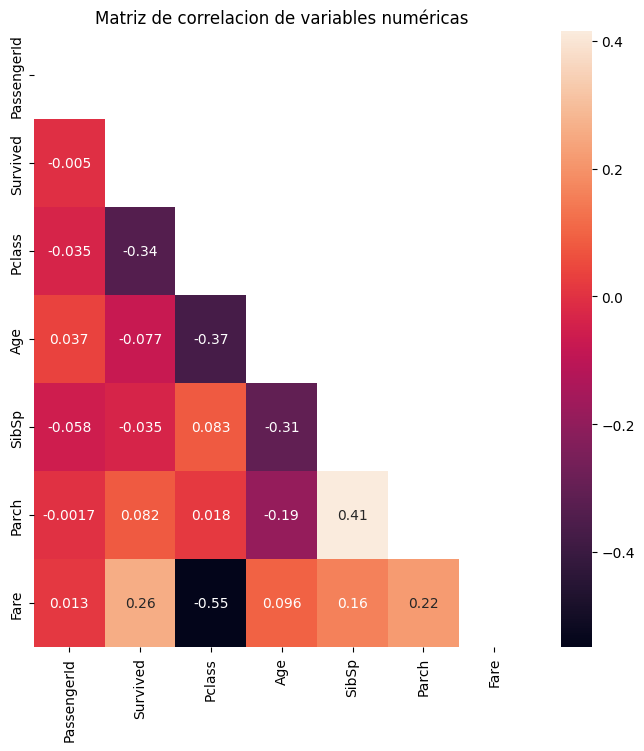

In [ ]:
corr_df = train.corr(method='pearson')
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(corr_df))
corrmat=sns.heatmap(corr_df, annot=True, mask=mask)
plt.title('Matriz de correlacion de variables numéricas')
plt.show()

Como suponiamos, Pclass esta correlacioanda con la sobrevivencia. De la misma forma la tarifa muestra una correlación directa.

#Procesamiento de datos



> En base a las distintas observaciones realizadas, decidimos usar la información de parch y sibps, en conjunto como indicador de acompañantes. Con esto espero solucionar el problema que tienen ciertas categorias de estas variables. Age y Fare dado sus valores extremos, es mejor binarizar en categorias dichas distribuciones. De la variable Name se rescataran los titulos y se observara si aporta al dataset en el indice de sobrevivencia. Cabin y Ticket no serán utilizadas. De la misma forma, PassangerId se descarta del train. Embarked y Sex serán consideradas.



Variable Name a Variable titulo.

In [ ]:
train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
# pd.crosstab(train['Title'], train['Sex'])

Al observar la mayoria de los datos, agrupamos en otros lo que no nos sirven. Investigando tomamos terminos en otro idioma o concepto similares como mlle a miss

In [ ]:
# train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otro')
# train['Title'] = train['Title'].replace('Mlle', 'Miss')
# train['Title'] = train['Title'].replace('Ms', 'Miss')
# train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [ ]:
# train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Como buscamos realizar los procesamientos de datos tanto para los train como para los test por separado, pero estableciendo los mismos procedimientos, es que generaremos pipeline. Esto nos evitará contaminar cruzadamente los dataset y será más facil de realizar el procesamiento posterior.

Referencia: https://medium.com/@gurupratap.matharu/data-leakage-in-machine-learning-390d560f0969

1. Para la imputación de Age y Fare dada sus distribuciones se utilizará la mediana. Para embarked la moda.
2. Discretizamos Age y Fare dada sus distribuciones.
3. Creamos la variable titulo a partir de Name. Creamos familypool como acompañantes y la variable solo si es que no esta acompañado.

3. Eliminamos Name,Cabin y Ticket.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

#Imputación de age con su mediana.
class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    imputer=SimpleImputer(strategy="median")
    X["Age"]=imputer.fit_transform(X[["Age"]])
    return X
#Imputacion Fare con su mediana (testdataset)
class FareImputer(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    imputer=SimpleImputer(strategy="median")
    X["Fare"]=imputer.fit_transform(X[["Fare"]])
    return X

#Imputación embarked con el más frecuente.
class EmbarkedImputer(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    imputer=SimpleImputer(strategy="most_frequent")
    X["Embarked"]=imputer.fit_transform(X[["Embarked"]])
    return X
#Discretización data.
class Discretize(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    discretize=KBinsDiscretizer(n_bins=4, encode='ordinal')
    X[["Age"]]=discretize.fit_transform(X[["Age"]])
    X[["Fare"]]=discretize.fit_transform(X[["Fare"]])
    X['Age'] = X['Age'].astype(int)
    X['Fare'] = X['Fare'].astype(int)
    # X=X.to_numpy
    return X
#Creamos titulo
class Titlecolumn(BaseEstimator, TransformerMixin):
  def fit(self,X,Y=None):
    return self
  def transform(self,X):
    X['Title'] = X.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    X['Title'] = X['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Otro')
    X['Title'] = X['Title'].replace('Mlle', 'Miss')
    X['Title'] = X['Title'].replace('Ms', 'Miss')
    X['Title'] = X['Title'].replace('Mme', 'Mrs')
    return X

#Creamos familypool
class Familypool(BaseEstimator, TransformerMixin):
  def fit(self,X,Y=None):
    return self
  def transform(self,X):
    X['Fpool'] = X['SibSp'] + X['Parch']
    return X
#Creamos Alone
class Alone(BaseEstimator, TransformerMixin):
  def fit(self,X,Y=None):
    return self
  def transform(self,X):
    X['Alone'] = 1 #initialize to yes/1 is alone
    X['Alone'].loc[X['Fpool'] > 0] = 0
    return X
class FeatureDrop(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X.drop(["Name","Ticket","Cabin","SibSp","Parch"],axis=1,errors="ignore")

#labelencoder
class NumericTransform():
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    X["Embarked"].replace(["Q","S","C"],[0,1,2],inplace=True)
    X["Sex"].replace(["male","female"],[0,1],inplace=True)
    X["Title"].replace(["Master", "Miss", "Mr", "Mrs", "Otro"],[0,1,2,3,4],inplace=True)
    return X



In [ ]:
#Generamos el pipeline con los estimadores establecidos anteriormente.
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ("ageimputer",AgeImputer()),
    ("fareimputer",FareImputer()),
    ("embarkedimputer",EmbarkedImputer()),
    ("title",Titlecolumn()),
    ("Fampool",Familypool()),
    ("alone",Alone()),
     ("discretize",Discretize()),
    ("featuredrop",FeatureDrop()),
    ("labelencoder",NumericTransform())

])



1.   Iterando observamos que la variable family pool tiene el mismo problema anterior respecto a ciertas categorias, mientras que Alone no lo tiene. Por lo que nos quedamos con dicha variable.
2.  No lo consideramos en el pipeline ya que es propio del train, pero elimianremos PassangerId posteriormente.



In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_ejemplo=pipeline.fit_transform(train)
train_ejemplo

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fpool,Alone
0,1,0,3,0,1,0,1,2,1,0
1,2,1,1,1,3,3,2,3,1,0
2,3,1,3,1,1,1,1,1,0,1
3,4,1,1,1,3,3,1,3,1,0
4,5,0,3,0,3,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,1,1,4,0,1
887,888,1,1,1,0,2,1,1,0,1
888,889,0,3,1,2,2,1,1,3,0
889,890,1,1,0,1,2,2,2,0,1


In [ ]:
import statsmodels.regression.linear_model as sm
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=train_ejemplo.drop(["PassengerId",'Survived'],axis=1)
calculate_vif(X)

,Var,Vif
5,Title,7.83
0,Pclass,7.76
4,Embarked,5.75
3,Fare,5.33
7,Alone,4.76
2,Age,4.23
6,Fpool,3.27
1,Sex,1.67


Presenciamos un alto VIF de la mayoria de las columnas indicando multicolinealidad

ref:https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

In [ ]:
train_ejemplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   Fare         891 non-null    int64
 6   Embarked     891 non-null    int64
 7   Title        891 non-null    int64
 8   Fpool        891 non-null    int64
 9   Alone        891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [ ]:
variable="Sex"
print(f"Porcentaje de sobrevivencia [1] o muerte [0] por categoria {variable}.")
pd.crosstab(index=train[variable],columns=train["Survived"], margins=False).apply(lambda r: r/r.sum() *100,axis=1)

Porcentaje de sobrevivencia [1] o muerte [0] por categoria Sex.


Survived,0,1
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


#Modelos

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fpool,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,NaN,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,1,NaN,S,Otro,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,0,112053,2,B42,S,Miss,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,2,NaN,S,Miss,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,2,C148,C,Mr,0,1


In [ ]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

Ahora, realizar las transformaciones como se hizo con train_ejemplo lleva a errores de contaminación cruzada, por lo que antes es necesario separar el dataset y luego realizar el procesamiento.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]



#split dataset in cross-validation with this splitter class:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
# cv_split = model_selection.StratifiedKFold(n_splits = 10, shuffle=True, random_state = 5720 ) # run model 10x with 60/30 split intentionally leaving out 10%
cv_split = model_selection.ShuffleSplit(n_splits = 8, test_size = .2, train_size = .7, random_state = 0 )

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


#create table to compare MLA predictions
Target = ['Survived']
MLA_predict = train[Target]
y_pred= train[Target]
train_prueba=train.drop(["Survived","PassengerId"],axis=1)
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    pipeline=Pipeline([
    ("ageimputer",AgeImputer()),
    ("fareimputer",FareImputer()),
    ("embarkedimputer",EmbarkedImputer()),
    ("title",Titlecolumn()),
    ("Fampool",Familypool()),
    ("alone",Alone()),
     ("discretize",Discretize()),
    ("featuredrop",FeatureDrop()),
    ("labelencoder",NumericTransform()),
    ("model",alg)])
    cv_results = model_selection.cross_validate(pipeline, X=train_prueba, y=y_pred, cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!


    #save MLA predictions - see section 6 for usage

    pipeline=Pipeline([
    ("ageimputer",AgeImputer()),
    ("fareimputer",FareImputer()),
    ("embarkedimputer",EmbarkedImputer()),
    ("title",Titlecolumn()),
    ("Fampool",Familypool()),
    ("alone",Alone()),
    ("discretize",Discretize()),
    ("featuredrop",FeatureDrop()),
    ("labelencoder",NumericTransform())])
    train_2=pipeline.fit_transform(train_prueba)

    alg.fit(train_2, y_pred)
    MLA_predict[MLA_name] = alg.predict(train_2)

    row_index+=1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835674,0.826816,0.036527,0.140266
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.833266,0.826816,0.036527,0.116795
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.851726,0.814944,0.050584,0.132909
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.820024,0.809358,0.055229,0.156924
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.857143,0.808659,0.060283,0.069692
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.850923,0.807263,0.040189,0.488347
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.858146,0.806564,0.05229,0.277898
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.836477,0.805866,0.033257,0.033577
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.814607,0.803771,0.082293,0.032445
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.858146,0.801676,0.054308,0.167949


In [ ]:
# MLA_predict[["Survived","XGBClassifier","RandomForestClassifier","DecisionTreeClassifier"]]
MLA_predict

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
887,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
888,0,1,0,0,0,0,0,1,1,1,...,1,1,1,1,1,0,0,1,1,0
889,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


##Busqueda de hiperparametros

In [ ]:
#base model
model = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=5720)
pipeline=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
  ("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform()),
("model",model)])
base_results = model_selection.cross_validate(pipeline, X=train_prueba, y=y_pred, cv  = cv_split,return_train_score=True)

pipeline_2=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform())])
train_2=pipeline_2.fit_transform(train_prueba)

model.fit(train_2, y_pred)


print('BEFORE DT Parameters: ', model.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100))
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
# param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
#               #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
#               'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
#               #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
#               #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
#               #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
#               'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
#              }
param_grid ={
    "model__loss":["deviance"],
    "model__learning_rate": [0.01, 0.05,0.1],
    # "model__min_samples_split": np.linspace(0.1, 0.5, 12),
    # "model__min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "model__max_depth":[3,5],
    "model__max_features":["log2","sqrt"],
    "model__criterion": ["friedman_mse"],
    "model__subsample":[0.5, 0.8, 0.9, 1.0],
    # "model__n_estimators":[10,100,200],
    "model__random_state":[5720]
    }
#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(pipeline, param_grid=param_grid, scoring = 'accuracy', cv = cv_split,return_train_score=True)
tune_model.fit(train_prueba, y_pred)

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100))
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1.0, 'loss': 'log_loss', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 5720, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
BEFORE DT Training w/bin score mean: 83.15
BEFORE DT Test w/bin score mean: 81.35
BEFORE DT Test w/bin score 3*std: +/- 5.43
----------
AFTER DT Parameters:  {'model__criterion': 'friedman_mse', 'model__learning_rate': 0.01, 'model__loss': 'deviance', 'model__max_depth': 3, 'model__max_features': 'log2', 'model__random_state': 5720, 'model__subsample': 0.8}
AFTER DT Training w/bin score mean: 83.55
AFTER DT Test w/bin score mean: 82.89
AFTER DT Test w/bin score 3*std: +/- 3.55
----------


In [ ]:
model = svm.SVC(probability=True)
pipeline=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
  ("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform()),
("model",model)])
base_results = model_selection.cross_validate(pipeline, X=train_prueba, y=y_pred, cv  = cv_split,return_train_score=True)

pipeline_2=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform())])
train_2=pipeline_2.fit_transform(train_prueba)

model.fit(train_2, y_pred)


print('BEFORE DT Parameters: ', model.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100))
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
# param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
#               #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
#               'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
#               #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
#               #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
#               #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
#               'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
#              }
param_grid ={
    "model__C":[0.01,0.1,1,10],
    "model__kernel": ["linear", "poly", "rbf", "sigmoid"],
    "model__gamma":["scale","auto"],
    "model__random_state":[5720]
    }
#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(pipeline, param_grid=param_grid, scoring = 'accuracy', cv = cv_split,return_train_score=True)
tune_model.fit(train_prueba, y_pred)

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
BEFORE DT Training w/bin score mean: 83.57
BEFORE DT Test w/bin score mean: 82.68
BEFORE DT Test w/bin score 3*std: +/- 3.65
----------
AFTER DT Parameters:  {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'model__random_state': 5720}
AFTER DT Training w/bin score mean: 83.57
AFTER DT Test w/bin score mean: 82.68
AFTER DT Test w/bin score 3*std: +/- 3.65
----------


##Selección de variables

In [ ]:
#base model
model = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,
                                            criterion= 'friedman_mse', loss= 'deviance', max_depth= 3,
                                            max_features= 'log2', min_samples_split= 0.427, subsample=0.8,random_state= 5720)


print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)



#feature selection
train_2=pipeline_2.fit_transform(train_prueba)
model_rfe = feature_selection.RFECV(model, step = 1, scoring = 'accuracy', cv = cv_split)
model_rfe.fit(train_2, y_pred)

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = train_2.columns.values[model_rfe.get_support()]

rfe_results = model_selection.cross_validate(model, train_2[X_rfe], y_pred, cv  = cv_split,return_train_score=True)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', train_2[X_rfe].shape)
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training score mean: {:.2f}". format(rfe_results['train_score'].mean()*100))
print("AFTER DT RFE Test score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
# print('-'*10)

BEFORE DT RFE Training w/bin score mean: 83.15
BEFORE DT RFE Test w/bin score mean: 81.35
BEFORE DT RFE Test w/bin score 3*std: +/- 5.43
----------
AFTER DT RFE Training Shape New:  (891, 7)
AFTER DT RFE Training Columns New:  ['Pclass' 'Sex' 'Fare' 'Embarked' 'Title' 'Fpool' 'Alone']
AFTER DT RFE Training score mean: 80.48
AFTER DT RFE Test score mean: 80.38
AFTER DT RFE Test score 3*std: +/- 5.89


In [ ]:
# Incorporamos al pipeline el posterior procesamiento de la columnas seleccionadas.
class FeatureSelect():

  def fit(self,X,Y=None):
    return self
  def transform(self,X):
    array=['Pclass','Sex', "Fare", 'Embarked', 'Title',"Fpool","Alone"]
    array=np.array(array)
    return X[array]
pipeline=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform()),
("feature_select",FeatureSelect()),
("model",model)])

#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(pipeline, param_grid=param_grid, scoring = 'accuracy', cv = cv_split,return_train_score=True)
rfe_tune_model.fit(train_prueba, y_pred)

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100))
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

AFTER DT RFE Tuned Parameters:  {'model__criterion': 'friedman_mse', 'model__learning_rate': 0.05, 'model__loss': 'deviance', 'model__max_depth': 5, 'model__max_features': 'log2', 'model__random_state': 5720, 'model__subsample': 1.0}
AFTER DT RFE Tuned Training w/bin score mean: 81.22
AFTER DT RFE Tuned Test w/bin score mean: 81.22
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 3.65
----------


#Predecir

##Data

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fpool,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,NaN,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,1,NaN,S,Otro,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,0,112053,2,B42,S,Miss,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,2,NaN,S,Miss,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,2,C148,C,Mr,0,1


In [ ]:
y=train["Survived"]
X=train.drop(["Survived","PassengerId"],axis=1)
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fpool,Alone
0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,NaN,S,Mr,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,3,C85,C,Mrs,1,0
2,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,NaN,S,Miss,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,3,C123,S,Mrs,1,0
4,3,"Allen, Mr. William Henry",male,3,0,0,373450,1,NaN,S,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,1,0,0,211536,1,NaN,S,Otro,0,1
887,1,"Graham, Miss. Margaret Edith",female,0,0,0,112053,2,B42,S,Miss,0,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,2,1,2,W./C. 6607,2,NaN,S,Miss,3,0
889,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,2,C148,C,Mr,0,1


##Modelos

In [ ]:
model = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.05,
                                            criterion= 'friedman_mse', loss= 'deviance', max_depth= 3,
                                            max_features= 'log2', subsample=0.8,random_state= 5720)


In [ ]:
model_2=ensemble.GradientBoostingClassifier(n_estimators=100,criterion= 'friedman_mse', learning_rate= 0.05,
                                            loss= 'deviance', max_depth= 5, max_features= 'log2', random_state= 5720, subsample= 1.0)

In [ ]:
model_3=svm.SVC(C=1, gamma= 'scale', kernel= 'rbf', probability=True)

In [ ]:
pipeline_1=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform()),
("model",model)])

pipeline_2=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform()),
("feature_select",FeatureSelect()),
("model",model_2)])

pipeline_3=Pipeline([
("ageimputer",AgeImputer()),
("fareimputer",FareImputer()),
("embarkedimputer",EmbarkedImputer()),
("title",Titlecolumn()),
("Fampool",Familypool()),
("alone",Alone()),
("discretize",Discretize()),
("featuredrop",FeatureDrop()),
("labelencoder",NumericTransform()),
("model",model_3)])


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#K in [5,10]
kf=KFold(n_splits=5,shuffle=True,random_state=5720)
score=cross_val_score(pipeline_1, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f"Resultados{score}")
print(f"\nPromedio:{np.mean(score)}")

print("================================")
score=cross_val_score(pipeline_2, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f"Resultados{score}")
print(f"\nPromedio:{np.mean(score)}")
print("================================")
score=cross_val_score(pipeline_3, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print(f"Resultados{score}")
print(f"\nPromedio:{np.mean(score)}")


Resultados[0.79329609 0.82022472 0.83707865 0.8258427  0.83146067]

Promedio:0.8215805661917017
Resultados[0.7877095  0.80898876 0.80898876 0.81460674 0.81460674]

Promedio:0.8069801016885318
Resultados[0.83240223 0.83146067 0.84269663 0.8258427  0.84269663]

Promedio:0.835019772770071


##Submit:

In [ ]:
test=pd.read_csv("test.csv")
X_pred=test.drop("PassengerId",axis=1)
# X=pipeline_data.fit_transform(X)
pipeline_1.fit(X,y)
# X_pred=pipeline_data.fit_transform(X_pred)
y_pred_1=pipeline_1.predict(X_pred)
y_pred_1

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
pipeline_2.fit(X,y)
# X_pred=pipeline_data.fit_transform(X_pred)
y_pred_2=pipeline_2.predict(X_pred)
y_pred_2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
pipeline_3.fit(X,y)
# X_pred=pipeline_data.fit_transform(X_pred)
y_pred_3=pipeline_3.predict(X_pred)
y_pred_3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_final=pd.DataFrame([test["PassengerId"]]).T
df_final["Survived"]=y_pred_1
df_final.to_csv("submission_1_gb1.csv",index=False)
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_final=pd.DataFrame([test["PassengerId"]]).T
df_final["Survived"]=y_pred_2
df_final.to_csv("submission_1_gb2.csv",index=False)
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_final=pd.DataFrame([test["PassengerId"]]).T
df_final["Survived"]=y_pred_3
df_final.to_csv("submission_1_svm.csv",index=False)
df_final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
